<a href="https://colab.research.google.com/github/Amin1708-git/NFL-2024/blob/main/Plotting%20NFL%20total%20play%20count%20change%20over%20the%20years.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving play count with totals and years.xlsx to play count with totals and years.xlsx


In [ ]:
import pandas as pd

# Read the first file
df = pd.read_excel('play count with totals and years.xlsx')

In [ ]:
df

In [ ]:
total = df['total_play_count']
#change = total.pct_change()
df['change'] = total.pct_change()
df.head()

<ipython-input-4-3fc559a64d66>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['change_type'] = np.where(df['change'] >= 0, 'Increase', 'Decrease')


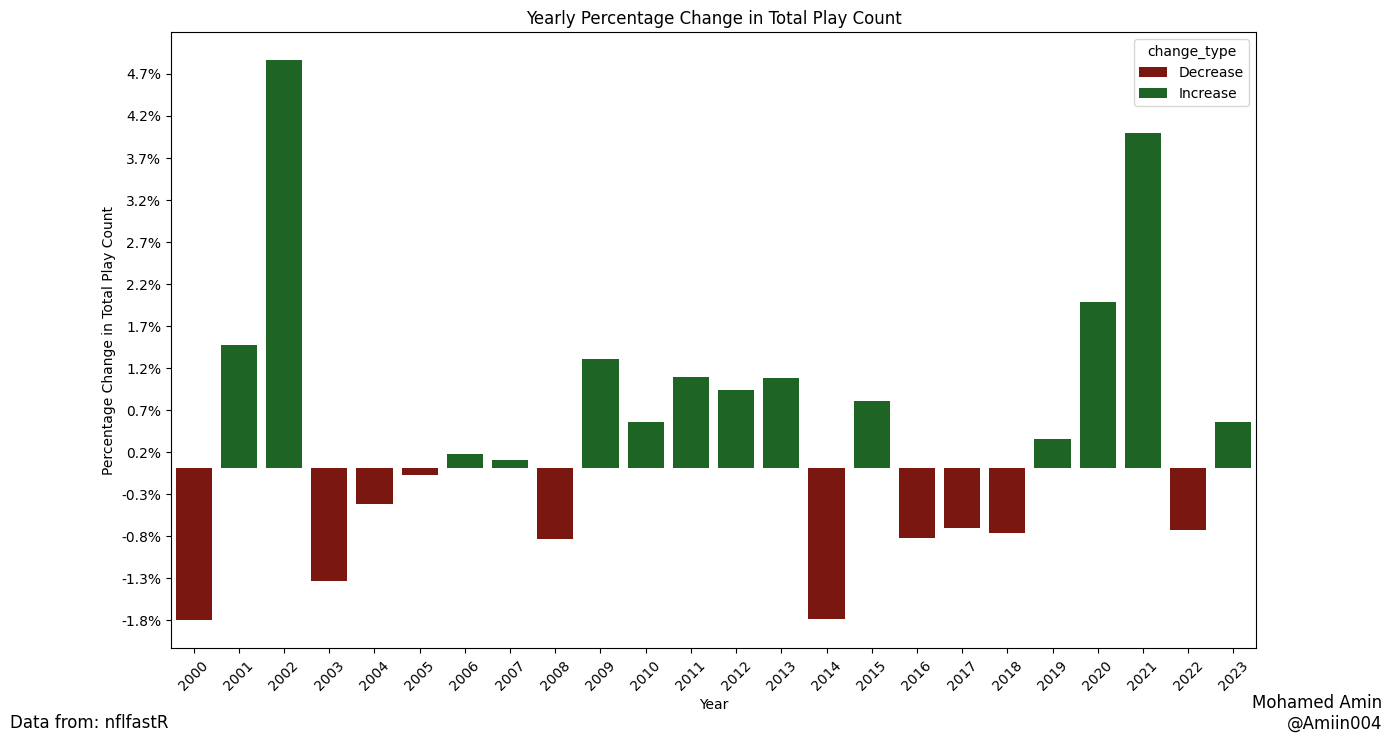

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming your DataFrame df has columns 'year' and 'total_play_count'
df['change'] = df['total_play_count'].pct_change()

# Remove the first row with NaN change
df = df.dropna()

# Create a new column to categorize change as 'Increase' or 'Decrease'
df['change_type'] = np.where(df['change'] >= 0, 'Increase', 'Decrease')

# Ensure all years are included by creating a complete range of years
all_years = np.arange(df['year'].min(), df['year'].max() + 1)
df = df.set_index('year').reindex(all_years).reset_index()

# Fill NaN values in 'change' and 'change_type'
df['change'].fillna(0, inplace=True)
df['change_type'].fillna('No Data', inplace=True)

# Define a more visible color palette including a color for 'No Data'
increase_color = sns.color_palette("dark", 10)[2]  # Dark green for increase
decrease_color = sns.color_palette("dark", 10)[3]  # Dark red for decrease
no_data_color = sns.color_palette("dark", 10)[1]  # Dark grey for no data
custom_palette = {"Increase": increase_color, "Decrease": decrease_color, "No Data": no_data_color}

# Create the horizontal bar plot
plt.figure(figsize=(14, 8))
sns.barplot(y='change', x='year', data=df, hue='change_type', palette=custom_palette, dodge=False)

# Adding labels and title
plt.ylabel('Percentage Change in Total Play Count')
plt.xlabel('Year')
plt.title('Yearly Percentage Change in Total Play Count')

# Set y-axis ticks to include more granularity (e.g., 0.5%)
yticks = np.arange(df['change'].min(), df['change'].max(), 0.005)  # 0.5% is 0.005 in decimal
plt.yticks(yticks, [f'{tick:.1%}' for tick in yticks])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add captions at the bottom of the plot
plt.figtext(0.01, 0.01, 'Data from: nflfastR', ha='left', fontsize=12)
plt.figtext(0.99, 0.01, 'Mohamed Amin\n@Amiin004', ha='right', fontsize=12)

# Save and display the plot
plt.savefig('Yearly_Percentage_Change_in_Total_Play_Count.jpg')
plt.show()
